# <center><b>Data Mining in Medical Field
## <center>——Prediction of Chronic Kidney Disease
## <center>_Designed by ZHU Lei_
---

In this article, I will explore the data set of chronic kidney disease with you and make a complete analysis. The main goal of this article is to predict whether a person will suffer from chronic kidney disease based on the data provided.

![avatar](1.png)

### <center>Preparation
---
#### Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

#### Read data
Use the style method of pandas to highlight the specified value, and the missing value is displayed here.

In [4]:
df = pd.read_csv('kidney.csv')
data = df
col = data.select_dtypes(exclude=['object']).columns
format_dict = dict(zip(col, len(col) * ["{:.2f}"]))
format_dict["sg"] = "{:.3f}"

data.head(10).style.highlight_null()\
                   .format(format_dict)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.00,80.00,1.020,1.00,0.00,nan,normal,notpresent,notpresent,121.00,36.00,1.20,nan,nan,15.40,44.00,7800.00,5.20,yes,yes,no,good,no,no,ckd
1,7.00,50.00,1.020,4.00,0.00,nan,normal,notpresent,notpresent,nan,18.00,0.80,nan,nan,11.30,38.00,6000.00,nan,no,no,no,good,no,no,ckd
2,62.00,80.00,1.010,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,nan,nan,9.60,31.00,7500.00,nan,no,yes,no,poor,no,yes,ckd
3,48.00,70.00,1.005,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32.00,6700.00,3.90,yes,no,no,poor,yes,yes,ckd
4,51.00,80.00,1.010,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,nan,nan,11.60,35.00,7300.00,4.60,no,no,no,good,no,no,ckd
5,60.00,90.00,1.015,3.00,0.00,nan,nan,notpresent,notpresent,74.00,25.00,1.10,142.00,3.20,12.20,39.00,7800.00,4.40,yes,yes,no,good,yes,no,ckd
6,68.00,70.00,1.010,0.00,0.00,nan,normal,notpresent,notpresent,100.00,54.00,24.00,104.00,4.00,12.40,36.00,nan,nan,no,no,no,good,no,no,ckd
7,24.00,nan,1.015,2.00,4.00,normal,abnormal,notpresent,notpresent,410.00,31.00,1.10,nan,nan,12.40,44.00,6900.00,5.00,no,yes,no,good,yes,no,ckd
8,52.00,100.00,1.015,3.00,0.00,normal,abnormal,present,notpresent,138.00,60.00,1.90,nan,nan,10.80,33.00,9600.00,4.00,yes,yes,no,good,no,yes,ckd
9,53.00,90.00,1.020,2.00,0.00,abnormal,abnormal,present,notpresent,70.00,107.00,7.20,114.00,3.70,9.50,29.00,12100.00,3.70,yes,yes,no,poor,no,yes,ckd


In [5]:
# Shape of dataset
df.shape

(400, 25)

### <center>Data preprocessing
---

In [6]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

#### Data Statistic

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


#### Count the total number of missing values for each feature

In [8]:
msno = df.isna().sum()
msno

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

#### Correlation matrix and matrix visualization

In [9]:
col = df.select_dtypes(exclude=['object']).columns
format_dict = dict(zip(col, len(col) * ["{0:.2%}"]))
df.corr().style.format(format_dict)\
               .background_gradient(cmap='summer')

/private/tmp/PKInstallSandbox.tDSkG1/tmp/ipykernel_88440/4141119591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.format(format_dict)\


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,100.00%,15.95%,-19.11%,12.21%,22.09%,24.50%,19.70%,13.25%,-10.00%,5.84%,-19.29%,-24.21%,11.83%,-26.89%
bp,15.95%,100.00%,-21.88%,16.07%,22.26%,16.02%,18.85%,14.62%,-11.64%,7.52%,-30.65%,-32.63%,2.98%,-26.19%
sg,-19.11%,-21.88%,100.00%,-46.98%,-29.62%,-37.47%,-31.43%,-36.15%,41.22%,-7.28%,60.26%,60.36%,-23.62%,57.95%
al,12.21%,16.07%,-46.98%,100.00%,26.93%,37.95%,45.35%,39.92%,-45.99%,12.90%,-63.46%,-61.19%,23.20%,-56.64%
su,22.09%,22.26%,-29.62%,26.93%,100.00%,71.78%,16.86%,22.32%,-13.18%,21.94%,-22.48%,-23.92%,18.49%,-23.74%
bgr,24.50%,16.02%,-37.47%,37.95%,71.78%,100.00%,14.33%,11.49%,-26.78%,6.70%,-30.62%,-30.14%,15.00%,-28.15%
bu,19.70%,18.85%,-31.43%,45.35%,16.86%,14.33%,100.00%,58.64%,-32.31%,35.70%,-61.04%,-60.76%,5.05%,-57.91%
sc,13.25%,14.62%,-36.15%,39.92%,22.32%,11.49%,58.64%,100.00%,-69.02%,32.61%,-40.17%,-40.42%,-0.64%,-40.09%
sod,-10.00%,-11.64%,41.22%,-45.99%,-13.18%,-26.78%,-32.31%,-69.02%,100.00%,9.79%,36.52%,37.69%,0.73%,34.49%
pot,5.84%,7.52%,-7.28%,12.90%,21.94%,6.70%,35.70%,32.61%,9.79%,100.00%,-13.37%,-16.32%,-10.56%,-15.83%


#### Find out the number of each class

In [10]:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

Inference: from the output, it can be inferred that this data set belongs to an unbalanced data set.

#### Target variable expressed as a percentage

In [11]:
countNoDisease = len(df[df['class'] == 0])
countHaveDisease = len(df[df['class'] == 1])
print("Percentage of patients without nephropathy：{:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of patients with kidney disease：{:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

Percentage of patients without nephropathy：0.00%
Percentage of patients with kidney disease：0.00%


#### Intuitively understand the balance of data

<Axes: title={'center': 'Nephrotic diagnosis count'}>

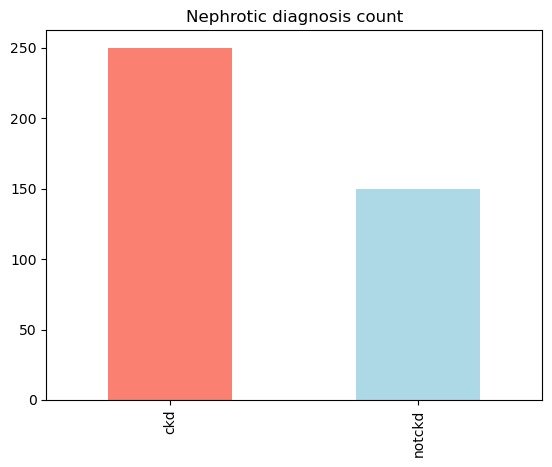

In [12]:
df['class'].value_counts().plot(kind='bar',
              color=['salmon', 'lightblue'],
              title= "Nephrotic diagnosis count")

#### Check age distribution

<Axes: ylabel='Frequency'>

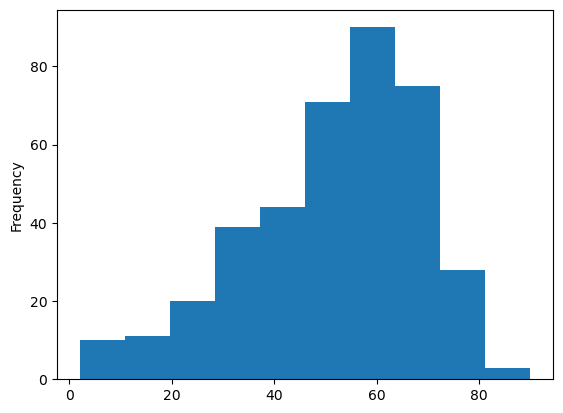

In [13]:
df['age'].plot(kind='hist')

Inference: with the help of histogram, we can see that people aged 50-60 are widely distributed in this data set.

#### Chart to see missing values in the dataset

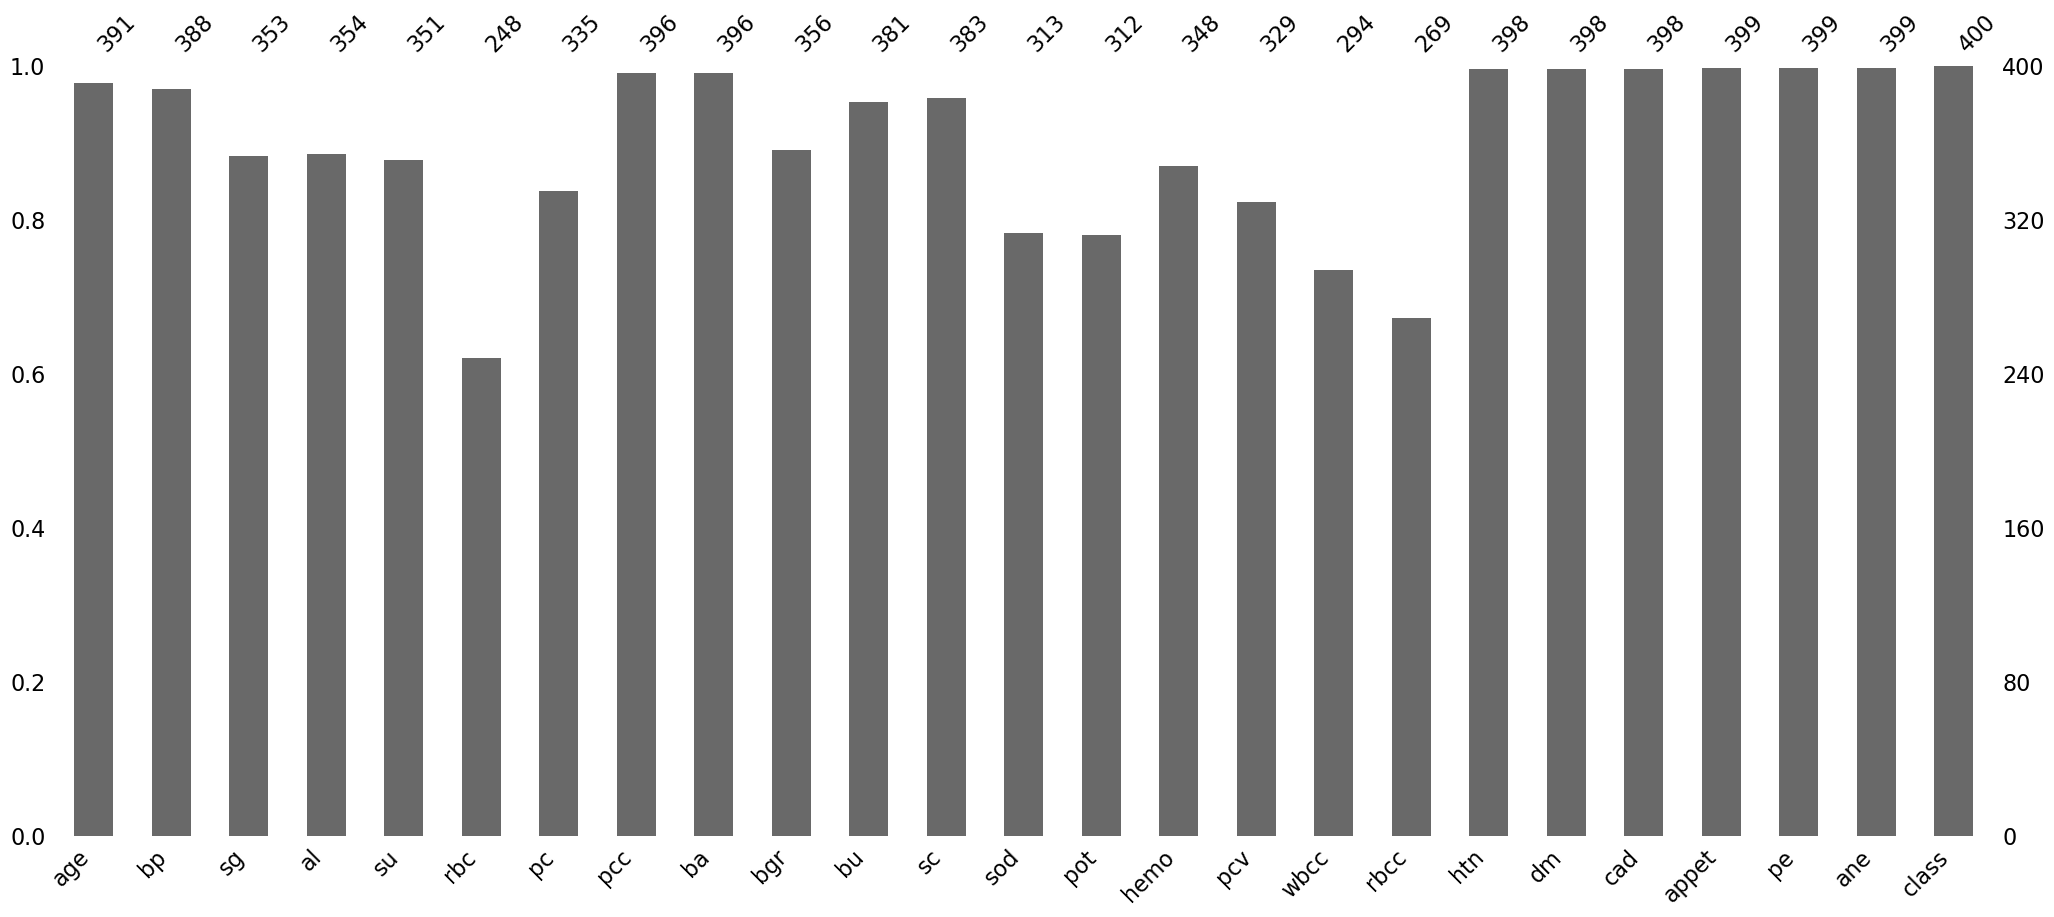

In [15]:
import missingno as msno
p = msno.bar(data)

Inference: any bar graph in the above figure that does not touch the top 400 has a null value.

/private/tmp/PKInstallSandbox.tDSkG1/tmp/ipykernel_88440/1058522977.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(data['bp'])


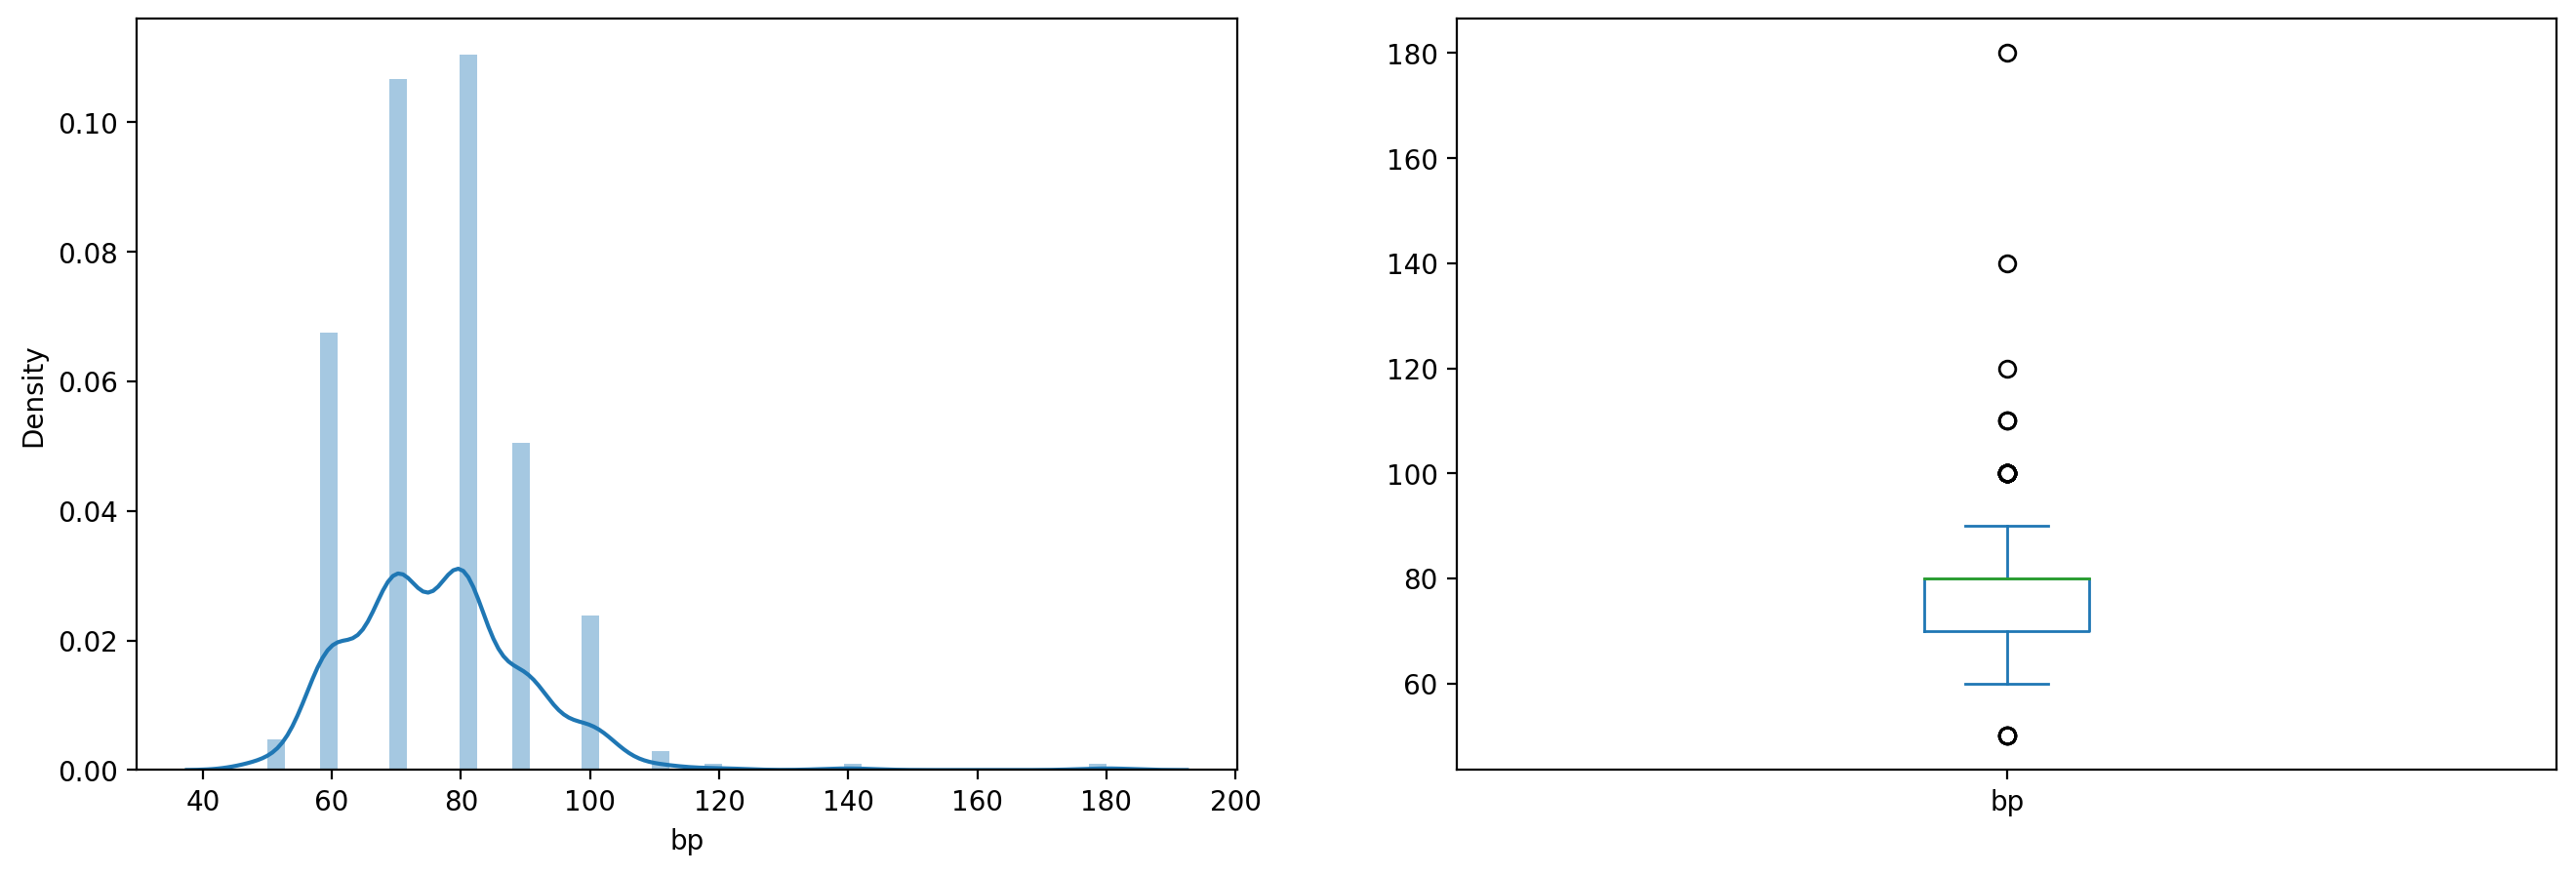

In [16]:
fig = plt.figure(figsize=(15,6), dpi=200)
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

Inference: in the above figure, you can see the distribution of blood pressure, and in the sub figure, you can see some abnormal values in the BP column.

#### Now convert the classification value (object) to the classification value (int)

In [17]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

#### Make statistics on class

In [18]:
data['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

#### Find the correlation between graphs

<Axes: >

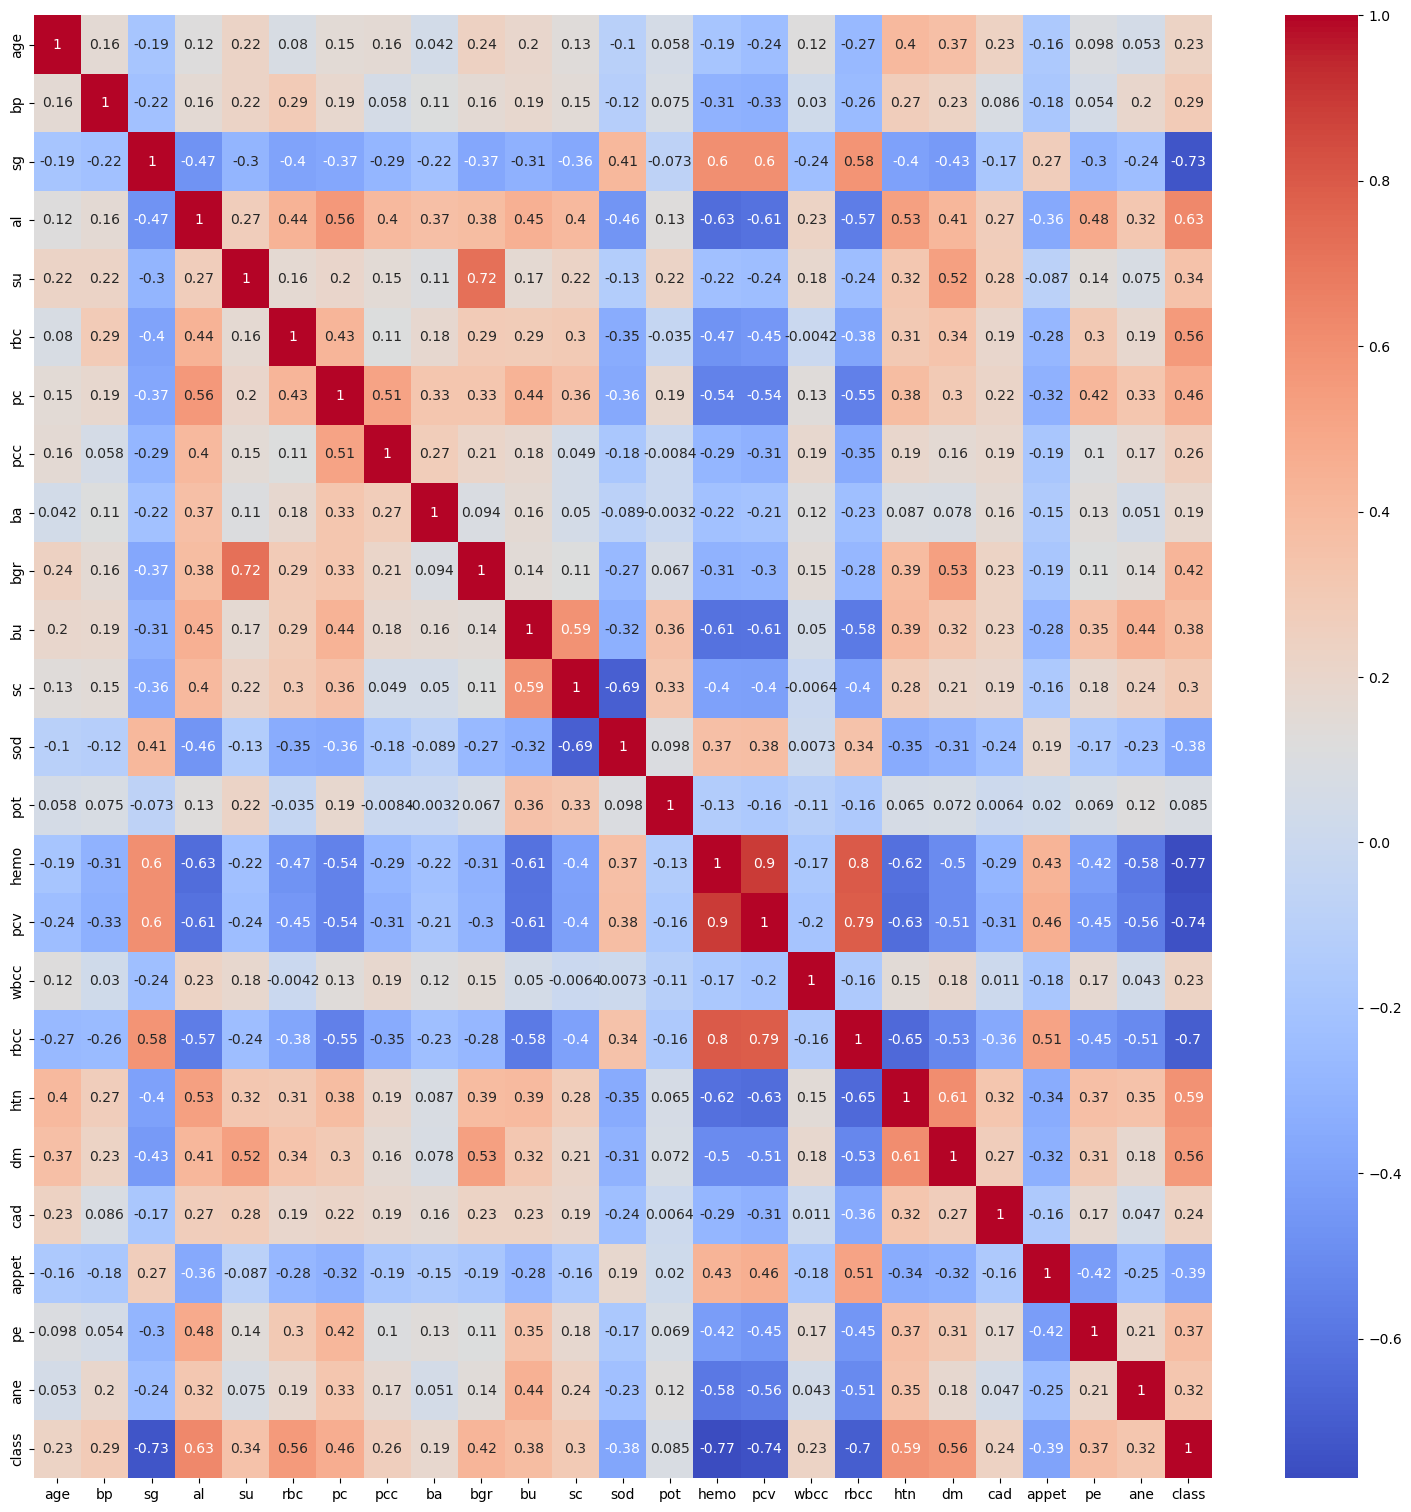

In [19]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # Find strong correlation with "class" column

Here I would like to mention some reasons that can seriously affect your kidney: Diabetes - blood glucose or diabetes, hypertension (BP), heart and vascular (cardiovascular) disease, smoking, obesity, African Americans, Indians or Asian Americans, family history of kidney disease, abnormal kidney structure, old age

### <center>Exploratory Data Analysis (EDA)
---

#### Column names in dataset

In [20]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

#### Delete null value

In [21]:
data.shape[0], data.dropna().shape[0]

(400, 158)

From the above output, we can see that there are only 158 non empty rows in the dataset. <br/>
Now there are only two options left, we can discard all null values or keep them. <br/>
Our data set is not so large. If we delete these null values, it will become smaller.

In [22]:
data.dropna(inplace=True)
data.shape

(158, 25)

In this case, if very little data is provided for the machine learning model, the performance will be very low, and we do not know that these null values are related to other features in the data set.<br/>
So this time I will keep these values and see how the model performs in this data set.<br/>
In addition, when we are engaged in some health care projects, we will predict whether the person has the disease, so one thing we should remember is that the model evaluation should have the minimum false positive rate.

### <center> Model Construction
---

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X = data.iloc[:,:-1]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)
logreg.fit(X_train,y_train)

/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Training score

In [24]:
logreg.score(X_train,y_train)

1.0

##### Test score

In [25]:
logreg.score(X_test,y_test)

1.0

##### Print accuracy of train and test

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


##### The cell below shows the coefficients for each variable.
(example on reading the coefficients from a Logistic Regression: a one unit increase in age makes an individual about e^0.14 time as likely to have ckd, while a one unit increase in blood pressure makes an individual about e^-0.07 times as likely to have ckd.

In [27]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0.167394,-0.052194,0.007589,0.482144,0.004475,0.01182,0.154023,0.007312,0.018082,0.15751,...,-0.318427,-0.680003,0.000524,-0.183698,0.137944,0.137169,0.000908,-0.004146,0.001898,0.007772


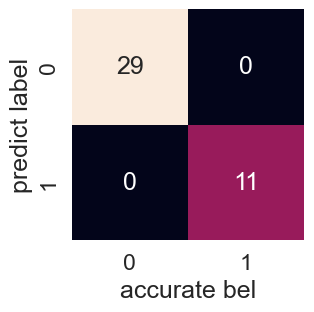

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Draw the confusion matrix using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("accurate bel")
    plt.ylabel("predict label")
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


#### K-nearest neighbor (KNN) classifier

It is a good practice to balance classes well before using KNN, because we know that KNN performs poorly in the case of unbalanced classes.

In [30]:
df["class"].value_counts()

0    115
1     43
Name: class, dtype: int64

##### Now join the class variables together

In [31]:
balance_df = pd.concat([df[df["class"] == 0], 
                        df[df["class"] == 1].sample(n = 115, 
                                                    replace = True)],
                       axis = 0)
balance_df.reset_index(drop=True, inplace=True)
balance_df["class"].value_counts()

0    115
1    115
Name: class, dtype: int64

##### data normalization

In [32]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

##### Adjust model parameters
For better accuracy, now adjust KNN model parameters.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {
"n_neighbors":[3,5,7,9],
"weights":["uniform","distance"],
"algorithm":["ball_tree","kd_tree","brute"],
"leaf_size":[25,30,35],
"p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)
preds = model.predict(X_test)

##### Confusion matrix of KNN model

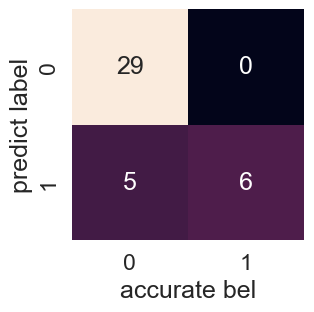

In [35]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 5
True Pos: 6


##### Feature importance
Here, a coefficient will be obtained from the feature, which indicates the weight of each feature.

In [37]:
feature_dict=dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict

{'age': 0.16739386709018936,
 'bp': -0.05219384580228047,
 'sg': 0.007588757355882893,
 'al': 0.4821435041252812,
 'su': 0.004474538241161437,
 'rbc': 0.011820171550310099,
 'pc': 0.1540227967140626,
 'pcc': 0.00731177387550259,
 'ba': 0.018081830779915174,
 'bgr': 0.15750971776116604,
 'bu': 0.18767649671613335,
 'sc': 0.14047935174382772,
 'sod': -0.05819996013978151,
 'pot': 0.05907013408210517,
 'hemo': -0.318427233355971,
 'pcv': -0.6800033366513943,
 'wbcc': 0.0005244647578163898,
 'rbcc': -0.18369756554182898,
 'htn': 0.13794365474215642,
 'dm': 0.1371693096130451,
 'cad': 0.0009077617617681021,
 'appet': -0.00414601202424249,
 'pe': 0.0018981298195903623,
 'ane': 0.0077717407526392765}

##### Visualize feature importance

<Axes: title={'center': 'Feature Importance'}, ylabel='Frequency'>

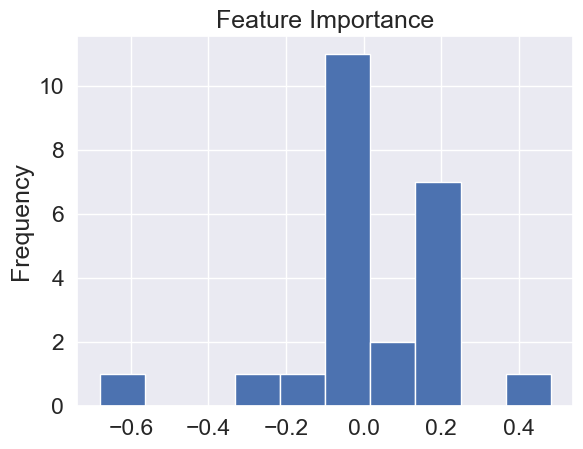

In [38]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",
            legend=False,
            title="Feature Importance")

<Axes: title={'center': 'Feature Importance'}>

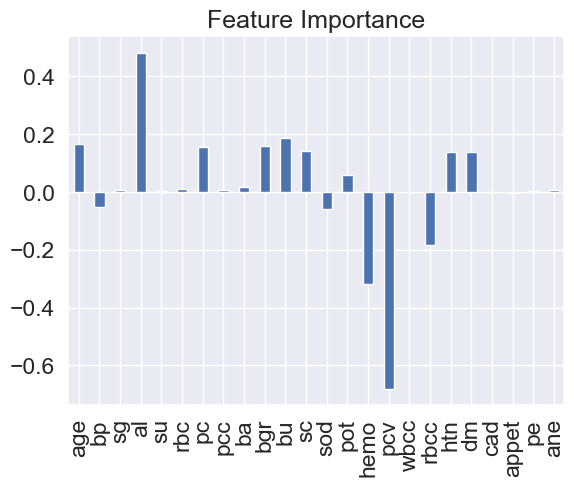

In [39]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",
            legend=False,
            title="Feature Importance")

### Save Model
---

In [40]:
import pickle

# Now with the help of pickle model, we will save the trained model
saved_model = pickle.dumps(logreg)
# Load pickle model
logreg_from_pickle = pickle.loads(saved_model)
# Model prediction results
logreg_from_pickle.predict(X_test)

/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

### <center>Conclusion
---
In this article, various machine learning models are used to classify whether patients will have chronic kidney problems according to patient data.<br/>
KNN needs class balance, data normalization and model tuning to get 100% accuracy, while logistic regression is 100% accurate without tuning.<br/>
In the case demonstrated in this article, logistic regression seems to be a better model. Although both have 100% accuracy, it uses the least resources because it doesn't even need model tuning.<br/>
For simple demonstration, this paper uses two very simple models. In practical work, different models need to be selected according to the actual situation. More complex integrated models can be selected, and sometimes neural network models are even needed.